# Decision Tree

# Task 4
## To Explore the Decision Tree Algorithm
     For the given 'Iris' dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

     This notebooks deals with understanding the working of decision trees.

## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import plot_tree

In [4]:
from sklearn.tree import export_graphviz
import pydotplus

In [6]:
# Reading the data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
df.shape

(150, 6)

In [9]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species' , axis = 1)
df1.shape

(150, 5)

In [10]:
# find the null values in the data
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

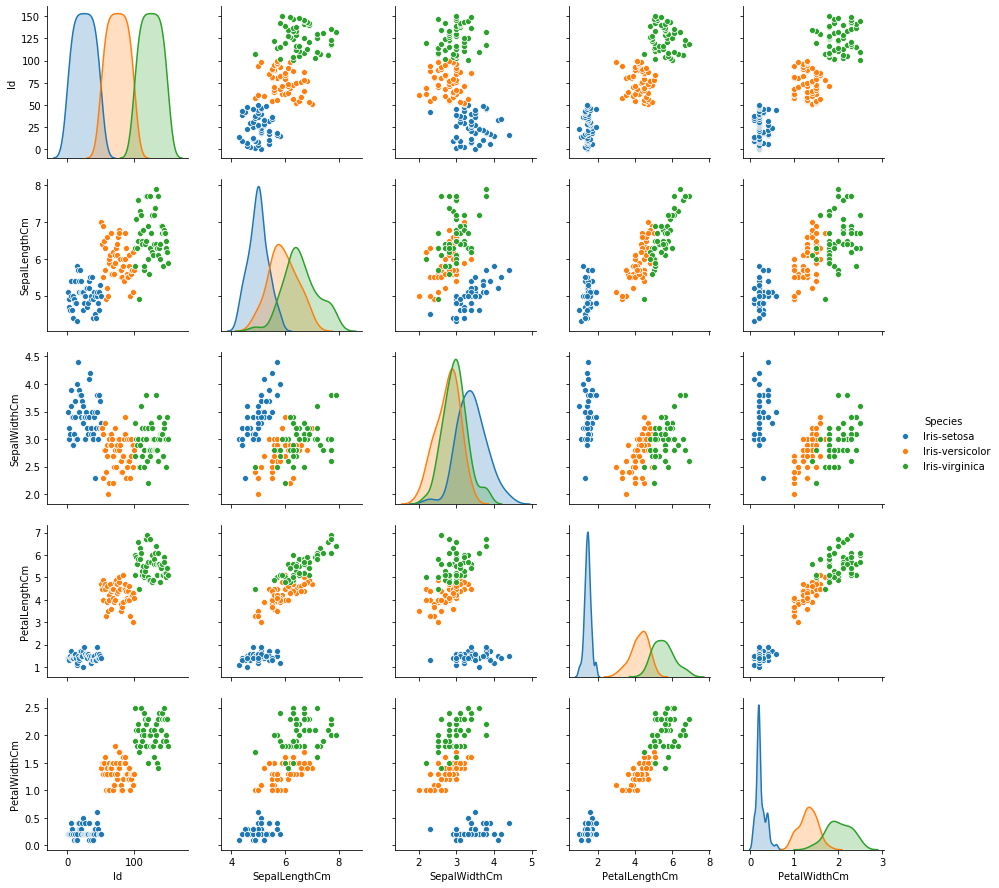

In [11]:
# no null values detected 
# plot the pair plot to visulize the attributes all at once

sns.pairplot(df , hue='Species')

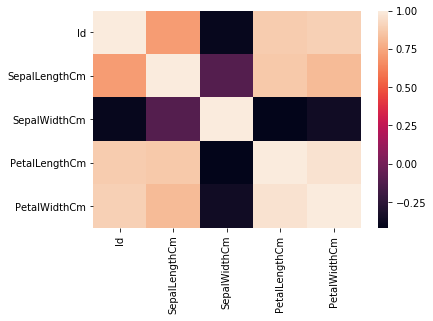

In [12]:
sns.heatmap(df.corr()) # correlation 

In [13]:
# definig the attributes and labels

X = df.iloc[: , [0,1,2,3]].values

le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values

df.shape

(150, 6)

# Training the Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(100, 4)

In [18]:
X_test.shape

(50, 4)

In [ ]:
# Decision Tree Clasifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [24]:
# predicting the values of the data
y_pred = clf.predict(X_test)
print('Classification Report \n' , classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred) # the accuracy score of the data

1.0

In [25]:
# finding the confusion matrix of the data
confusion_matrix(y_test , y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

Text(0.5, 1, 'Accuracy Score: 1.0')

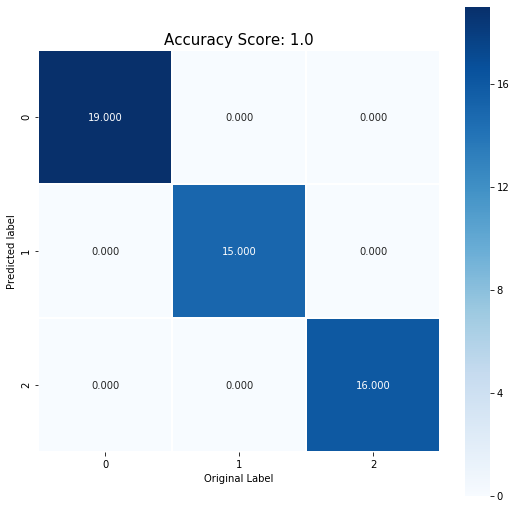

In [30]:
# lets plot the heatmap 
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm , annot=True , fmt='.3f' , 
            linewidths=.5 , 
            square=True,
            cmap='Blues');

plt.xlabel('Original Label');
plt.ylabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [31]:
from sklearn.tree import plot_tree

[Text(2678.3999999999996, 2265.0, 'X[0] <= 100.5\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'), Text(1785.6, 1359.0, 'X[0] <= 50.5\ngini = 0.498\nsamples = 66\nvalue = [31, 35, 0]'), Text(892.8, 453.0, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'), Text(2678.3999999999996, 453.0, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'), Text(3571.2, 1359.0, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]


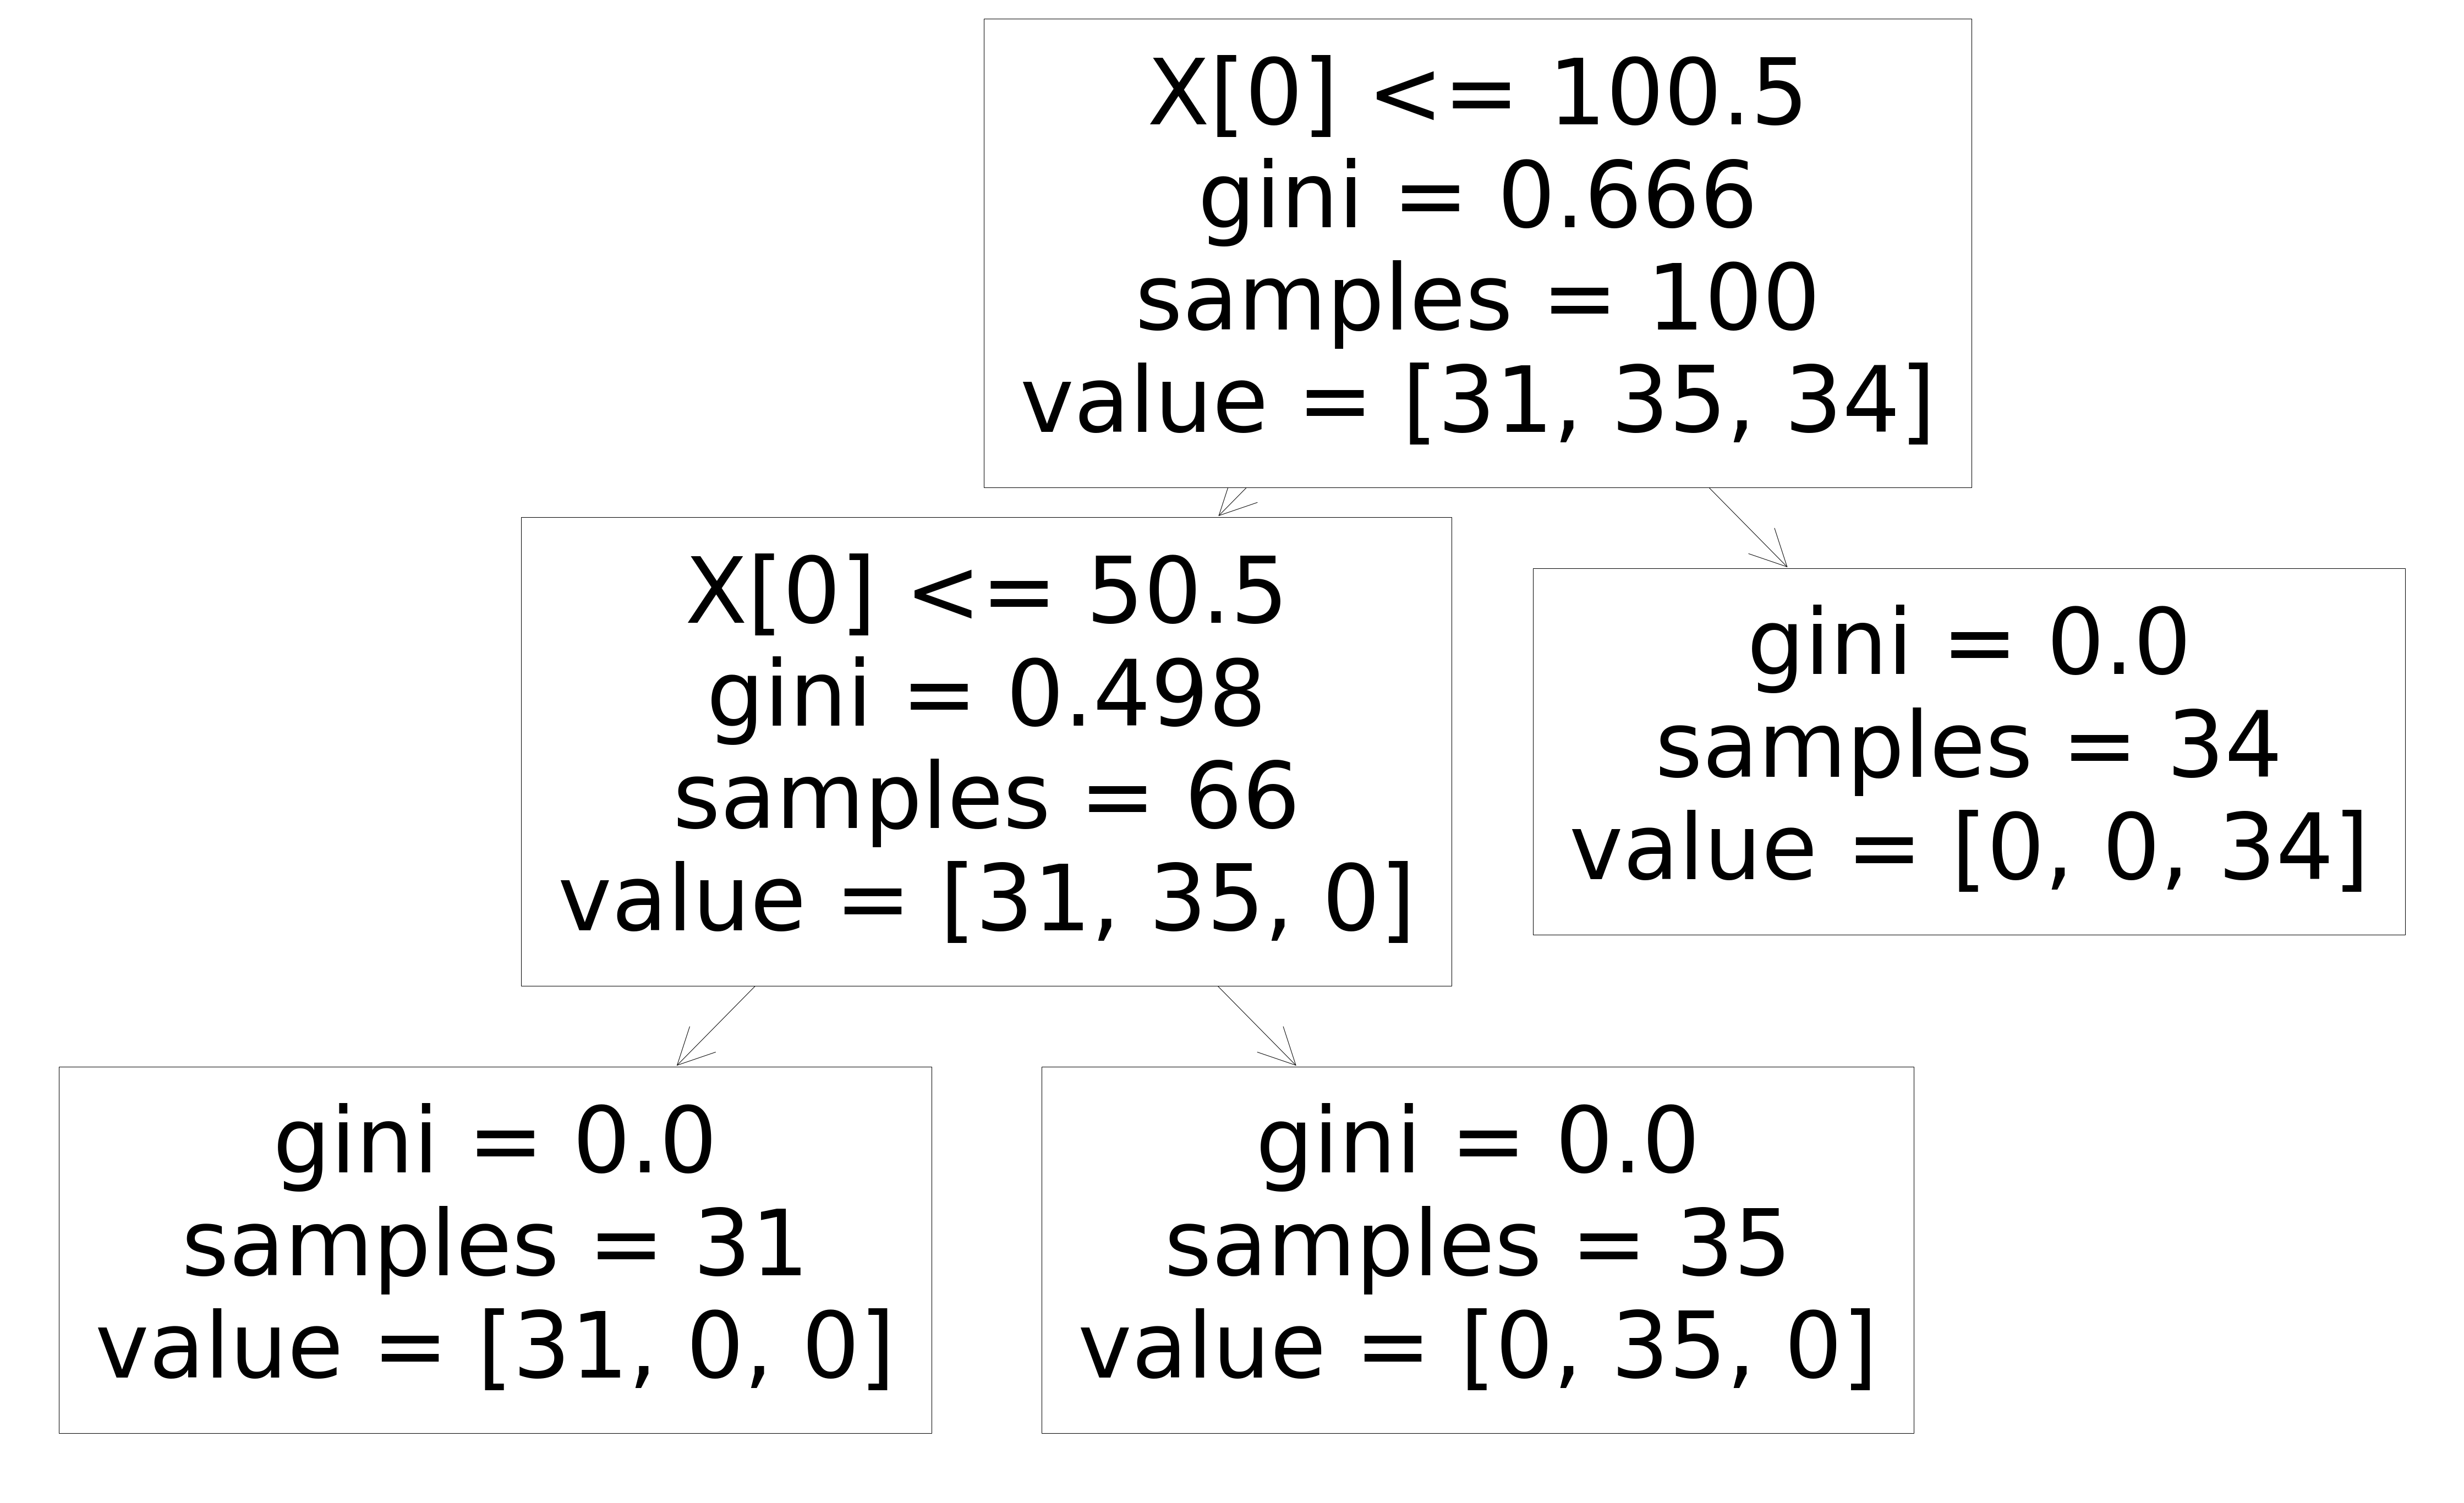

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80 , 50

print(plot_tree(clf))

In [ ]:
# Another method 

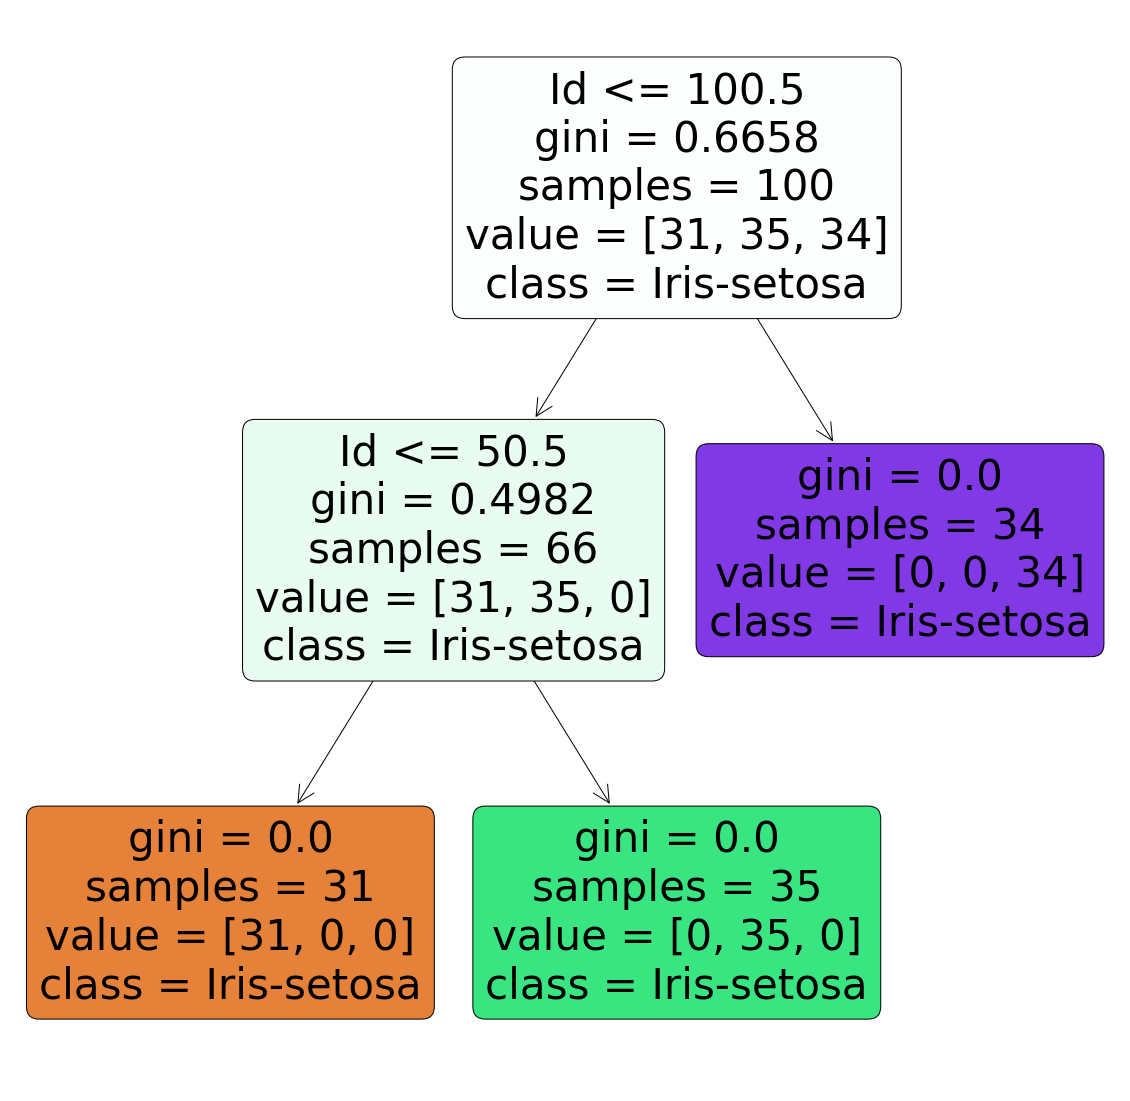

In [40]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(clf, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);

# Thanks @ Sparks foundation

# By:
# Bhubesh SR